Fra:1 Mem:32.80M (Peak 32.80M) | Time:00:00.00 | Syncing Light
Fra:1 Mem:32.80M (Peak 32.80M) | Time:00:00.00 | Syncing Camera
Fra:1 Mem:32.80M (Peak 32.80M) | Time:00:00.00 | Syncing Torus.011
Fra:1 Mem:34.15M (Peak 34.15M) | Time:00:00.00 | Rendering 1 / 64 samples
Fra:1 Mem:33.23M (Peak 34.15M) | Time:00:00.12 | Rendering 26 / 64 samples
Fra:1 Mem:33.23M (Peak 34.15M) | Time:00:00.21 | Rendering 51 / 64 samples
Fra:1 Mem:33.23M (Peak 34.15M) | Time:00:00.26 | Rendering 64 / 64 samples
Saved: 'test_torus.png'
 Time: 00:00.30 (Saving: 00:00.03)



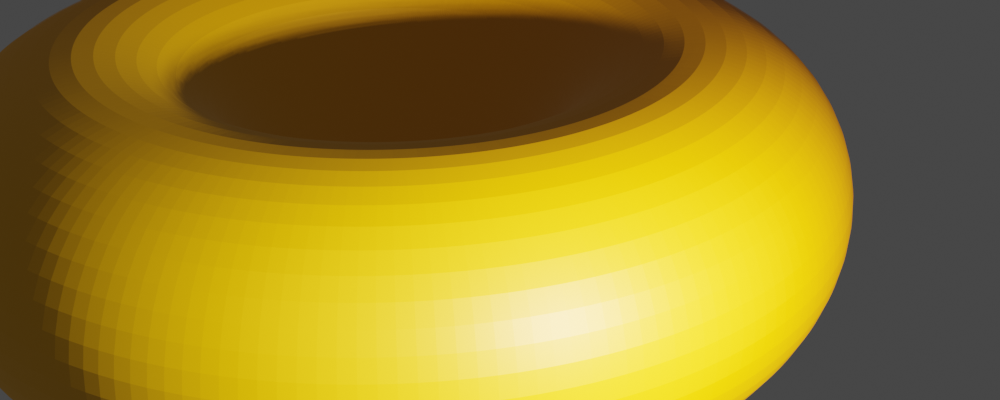

In [12]:
import bpy
from IPython.display import Image, display

# Delete all mesh objects from the scene
bpy.ops.object.select_all(action='DESELECT')
bpy.ops.object.select_by_type(type='MESH')
bpy.ops.object.delete()

# Add a torus
bpy.ops.mesh.primitive_torus_add(
    major_radius=1.5, 
    minor_radius=0.75, 
    major_segments=48*4, 
    minor_segments=12*4, 
    align="WORLD", 
    location=(0, 1, 1),
)

# Assigning the torus to a variable
torus = bpy.context.active_object

# Create a new material and assign it to the torus
material = bpy.data.materials.new(name="RainbowGradient")
torus.data.materials.append(material)
material.use_nodes = True
nodes = material.node_tree.nodes

# Clear default nodes
for node in nodes:
    nodes.remove(node)

# Add a Gradient Texture and set it to a color ramp of a rainbow
gradient = nodes.new(type="ShaderNodeTexGradient")
gradient.gradient_type = 'LINEAR'
gradient.location = (0,0)

ramp = nodes.new(type="ShaderNodeValToRGB")
ramp.color_ramp.interpolation = 'LINEAR'
ramp.location = (200,0)
ramp.color_ramp.elements[0].color = (1, 0.5, 0, 1)  # Intense Light Orange
ramp.color_ramp.elements[1].color = (1, 0.3, 0, 1)  # Intense Darker Orange

# Add Shader nodes
bsdf = nodes.new(type="ShaderNodeBsdfPrincipled")
bsdf.location = (400,0)

output = nodes.new(type="ShaderNodeOutputMaterial")
output.location = (600,0)

# Connect the nodes
material.node_tree.links.new
material.node_tree.links.new(gradient.outputs["Color"], ramp.inputs[0])
material.node_tree.links.new(ramp.outputs["Color"], bsdf.inputs["Base Color"])
material.node_tree.links.new(bsdf.outputs["BSDF"], output.inputs["Surface"])

# Rotate the gradient to apply it from left to right
torus.rotation_euler = (0, 0, 1.5708)  # Rotate 90 degrees on the Z axis

# Light
light = bpy.data.objects["Light"]
light.location = (4, 0, 2)  # Position the light to the left of the torus

# Camera
camera = bpy.data.objects["Camera"]
camera.location = (5, -3, 4)
camera.data.dof.use_dof = True
camera.data.dof.focus_distance = 5
camera.data.dof.aperture_fstop = 4 

# Render
path = "test_torus.png"
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 400
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image(path))
